<a href="https://colab.research.google.com/github/larhchim/Salary-Prediction-Classification-ML/blob/main/Projet_ML_LARHCHIM_EL_BIYAALI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
from collections import Counter
from scipy.stats import shapiro
import scipy
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler

Loading DataSet of Salary Prediction Classification

In [3]:
!pip install opendatasets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import opendatasets as od
import pandas

In [6]:
od.download("https://www.kaggle.com/datasets/ayessa/salary-prediction-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: larhchimismail
Your Kaggle Key: ··········


100%|██████████| 460k/460k [00:00<00:00, 64.2MB/s]

In [7]:
import pandas
 
# reading the CSV file
csvFile = pandas.read_csv('./salary-prediction-classification/salary.csv')
 
# displaying the contents of the CSV file
print(csvFile)

       age          workclass  fnlwgt    education  education-num  \
0       39          State-gov   77516    Bachelors             13   
1       50   Self-emp-not-inc   83311    Bachelors             13   
2       38            Private  215646      HS-grad              9   
3       53            Private  234721         11th              7   
4       28            Private  338409    Bachelors             13   
...    ...                ...     ...          ...            ...   
32556   27            Private  257302   Assoc-acdm             12   
32557   40            Private  154374      HS-grad              9   
32558   58            Private  151910      HS-grad              9   
32559   22            Private  201490      HS-grad              9   
32560   52       Self-emp-inc  287927      HS-grad              9   

            marital-status          occupation    relationship    race  \
0            Never-married        Adm-clerical   Not-in-family   White   
1       Married-civ-spo

In [8]:
df = pd.read_csv("./salary-prediction-classification/salary.csv")

In [9]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [10]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [11]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [12]:
df.head(2).transpose()

,0,1
age,39,50
workclass,State-gov,Self-emp-not-inc
fnlwgt,77516,83311
education,Bachelors,Bachelors
education-num,13,13
marital-status,Never-married,Married-civ-spouse
occupation,Adm-clerical,Exec-managerial
relationship,Not-in-family,Husband
race,White,White
sex,Male,Male


Cleaning the Data

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [21]:
df['workclass'] = df['workclass'].astype("string")
df['education'] = df['education'].astype("string")
df['marital-status'] = df['marital-status'].astype("string")
df['occupation'] = df['occupation'].astype("string")
df['relationship'] = df['relationship'].astype("string")
df['race'] = df['race'].astype("string")
df['sex'] = df['sex'].astype("string")
df['native-country'] = df['native-country'].astype("string")
df['salary'] = df['salary'].astype("string")



In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  string
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  string
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  string
 6   occupation      32561 non-null  string
 7   relationship    32561 non-null  string
 8   race            32561 non-null  string
 9   sex             32561 non-null  string
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  string
 14  salary          32561 non-null  string
dtypes: int64(6), string(9)
memory usage: 3.7 MB


In [26]:
df['workclass'].describe()

count        32561
unique          16
top        HS-grad
freq         10501
Name: education, dtype: object

In [27]:
df['education'].describe()

count        32561
unique          16
top        HS-grad
freq         10501
Name: education, dtype: object

In [28]:
df['marital-status'].describe()

count                   32561
unique                      7
top        Married-civ-spouse
freq                    14976
Name: marital-status, dtype: object

In [29]:
df['occupation'].describe()

count               32561
unique                 15
top        Prof-specialty
freq                 4140
Name: occupation, dtype: object

In [30]:
df['relationship'].describe()

count        32561
unique           6
top        Husband
freq         13193
Name: relationship, dtype: object

In [31]:
df['race'].describe()

count      32561
unique         5
top        White
freq       27816
Name: race, dtype: object

In [32]:
df['sex'].describe()

count     32561
unique        2
top        Male
freq      21790
Name: sex, dtype: object

In [33]:
df['salary'].describe()

count      32561
unique         2
top        <=50K
freq       24720
Name: salary, dtype: object

In [34]:
df['native-country'].describe()

count              32561
unique                42
top        United-States
freq               29170
Name: native-country, dtype: object

In [35]:
df['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [36]:
df['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [37]:
df['education-num'].describe()

count    32561.000000
mean        10.080679
std          2.572720
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64

In [38]:
df['capital-gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [39]:
df['capital-loss'].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital-loss, dtype: float64

In [40]:
df['hours-per-week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64

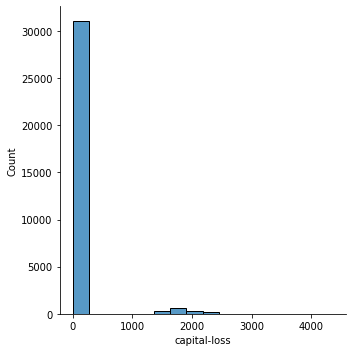

In [48]:
sns.displot(x="capital-loss",data=df)